In [1]:
import numpy as np
from skimage import io, exposure, transform
from matplotlib import pyplot as plt
from IPython.display import Image
import os, sys

In [2]:
%matplotlib inline

In [3]:
def read_band(n):
    """
    Load Landsat 8 band
    Input:
    n - integer in the range 1-11
    Output:
    img - 2D array of uint16 type
    """
    if n in range(1, 12):
        tif_list = os.listdir()
        band_name = 'B' + str(n) + '.TIF'
        img_idx = [idx for idx, band_string in enumerate(tif_list) if band_name in band_string]
        img = io.imread(tif_list[img_idx[0]])
        return img
    else:
        print('Band number has to be in the range 1-11!')

In [4]:
def color_image_show(img, title):
    """
    Show image
    Input:
    img - 3D array of uint16 type
    title - string
    """
    fig = plt.figure(figsize=(10, 10))
    fig.set_facecolor('white')
    plt.imshow(img/65535)
    plt.title(title)
    plt.show()

In [5]:
cd \Dataaa\LC08_L1TP_116049_20140530_20170422_01_T1.tar\LC08_L1TP_116049_20140530_20170422_01_T1\

D:\Dataaa\LC08_L1TP_116049_20140530_20170422_01_T1.tar\LC08_L1TP_116049_20140530_20170422_01_T1


In [6]:
b2 = read_band(2)
b3 = read_band(3)
b4 = read_band(4)

img432 = np.dstack((b4, b3, b2))
%reset_selective -f b

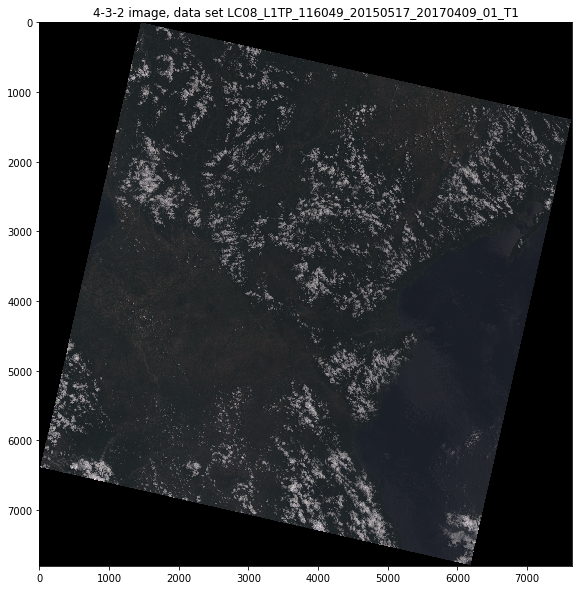

In [7]:
color_image_show(img432, '4-3-2 image, data set LC08_L1TP_116049_20150517_20170409_01_T1')

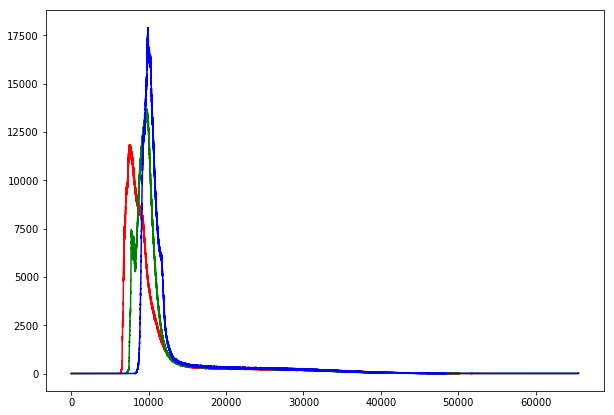

In [8]:
fig = plt.figure(figsize=(10, 7))
fig.set_facecolor('white')

for color, channel in zip('rgb', np.rollaxis(img432, axis=-1)):
    counts, centers = exposure.histogram(channel)
    plt.plot(centers[1::], counts[1::], color=color)

plt.show()

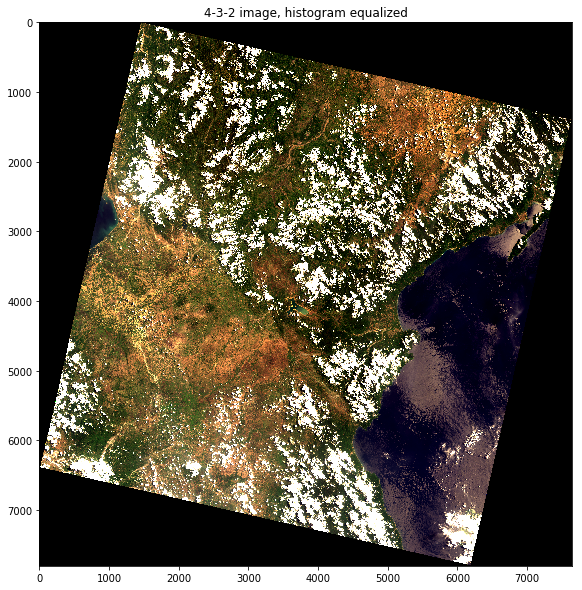

In [9]:
img432_ha = np.empty(img432.shape, dtype='uint16')
lims = [(7100,12500), (8200, 14000), (9200,17500)]
for lim, channel in zip(lims, range(3)):
    img432_ha[:, :, channel] = exposure.rescale_intensity(img432[:, :, channel], lim)

color_image_show(img432_ha, '4-3-2 image, histogram equalized')